In [1]:
!git clone https://github.com/weathon/vsf.git
!cd vsf && git stash && git switch fix_flux 

fatal: destination path 'vsf' already exists and is not an empty directory.
Saved working directory and index state WIP on fix_flux: 94c944f Change model ID and modify inference settings
Already on 'fix_flux'
Your branch is up to date with 'origin/fix_flux'.


In [2]:
import sys
import torch
sys.path.append("vsf")

In [3]:
import torch 
import sys
from diffusers import FluxTransformer2DModel
from pathlib import Path
transformer_path = Path("../flux/flux/transformer/diffusion_pytorch_model.safetensors")
config_path = Path("../flux/flux/transformer/config.json")
model = FluxTransformer2DModel.from_single_file(
    str(transformer_path),  
    config=str(config_path),
    torch_dtype=torch.bfloat16,
)

In [4]:

# from diffusers import FluxPipeline
from src.flux_pipeline import VSFFluxPipeline

dance_pipe = VSFFluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    torch_dtype=torch.bfloat16,
    transformer=model, 
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
dance_pipe = dance_pipe.to("cuda")

torch.Size([1, 1, 4096]) torch.Size([1, 14, 4096])
torch.Size([1, 242, 4096]) torch.Size([242, 3]) torch.Size([1, 14, 4096]) torch.Size([14, 3])
processor counts 19 38


  0%|          | 0/32 [00:00<?, ?it/s]

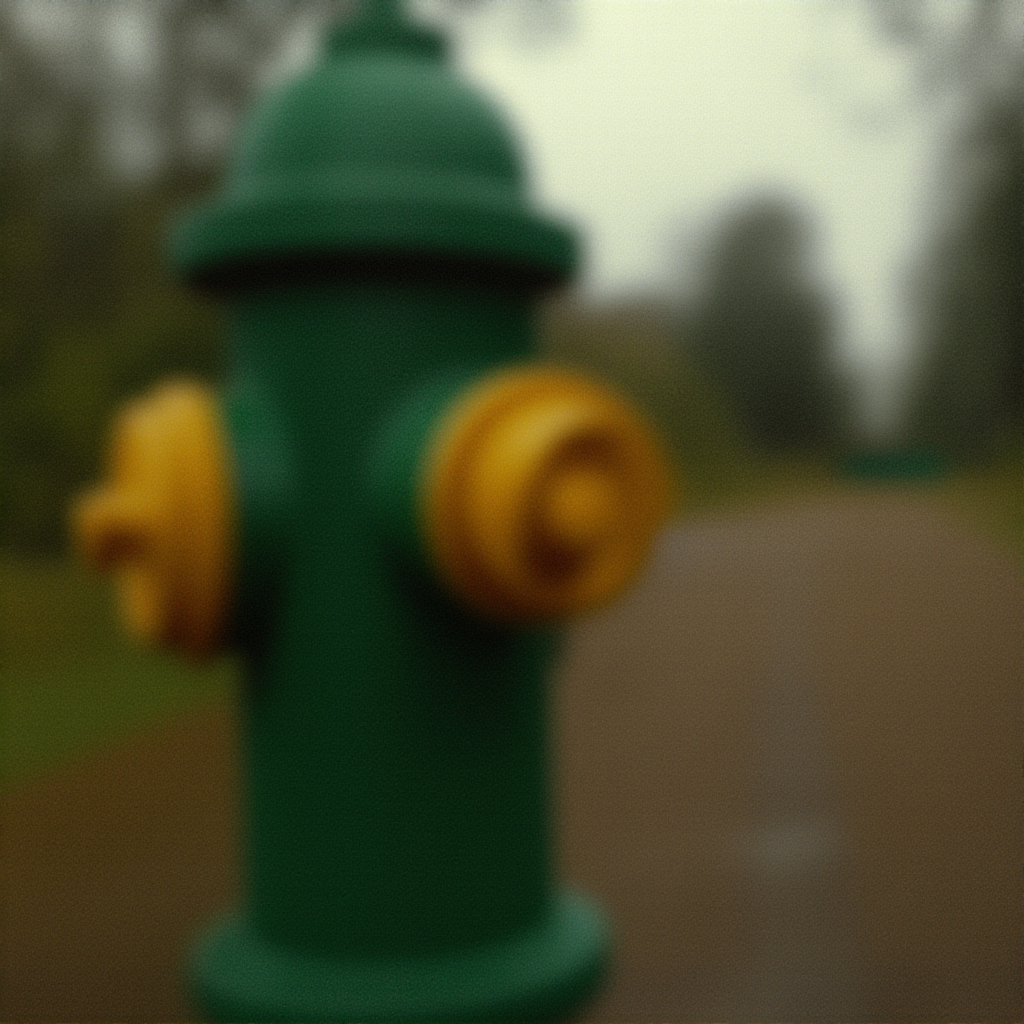

In [13]:
image = dance_pipe( 
    "A blurry, distorted close-up of a green and yellow fire hydrant, with heavy noise and lack of clarity, set against an empty, low-quality background that appears random and unfinished, emphasizing the image's lack of intent or design.",
    negative_prompt="sharp, clear, detailed, high-quality, intentional, polished",
    guidance_scale=0.0,
    num_inference_steps=32,
    max_sequence_length=256, 
    scale=2.6,
    generator=torch.Generator("cpu").manual_seed(54324)
).images[0]
image

In [7]:
# import huggingface_hub  
# huggingface_hub.login()

In [8]:
# import torch
# from nag import NAGFluxPipeline
# from nag import NAGFluxTransformer2DModel

# transformer = NAGFluxTransformer2DModel.from_pretrained(
#     "black-forest-labs/FLUX.1-dev",
#     subfolder="transformer",
#     torch_dtype=torch.bfloat16,
# )
# pipe = NAGFluxPipeline.from_pretrained(
#     "black-forest-labs/FLUX.1-dev",
#     transformer=transformer,
#     torch_dtype=torch.bfloat16,
# )
# pipe.to("cuda")

In [9]:
# image = pipe( 
#     "A dimly lit scene with a barely visible wooden lawn chair on dull green grass beside a shadowy wooden structure, obscured by low-quality, dark tones and lacking a clear focal point.",
#     nag_negative_prompt="bright colors, brightly lit, high visibility, blurry, high resolution",
#     guidance_scale=0.0,
#     num_inference_steps=32,
#     max_sequence_length=256, 
#     generator=torch.Generator("cpu").manual_seed(4857)
# ).images[0]
# image